In [102]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Gradient descent with one variable 

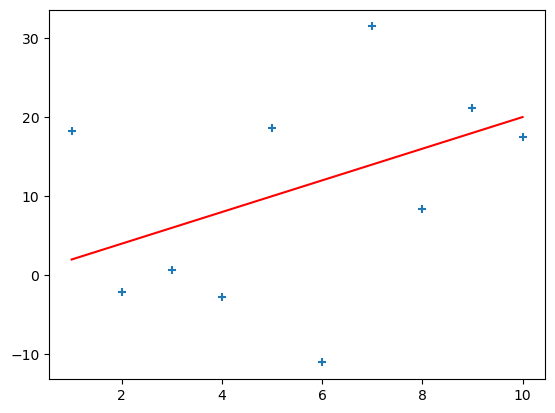

In [103]:
np.random.seed(1)

N = 10 
a0 = 2
X = np.arange(1,N+1)
Y = a0 * X + np.random.normal(0,10,N)

# create the scatter plot
plt.scatter(X, Y, marker="+")
#plot th line
plt.plot(X, a0*X,"r")

plt.show()

In [104]:
def rss(a, X, Y):
    n = len(X)
    err = 0
    for i in range(n):
        err += (Y[i] - a * X[i]) ** 2
    return err

In [105]:
def plot_rss(f, a_range):
    err_range = np.array([f(a) for a in a_range])
    plt.plot(a_range, err_range)

err = 1427.6757139745007


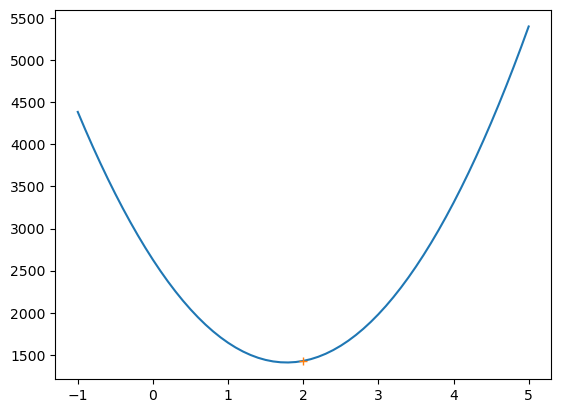

In [106]:
f = lambda a: rss(a, X,Y)
a_range = np.arange(a0-3, a0 + 3.1, 0.1)

plot_rss(f,a_range)
plt.plot(a0, f(a0), "+")
plt.show

err = f(a0)
print("err =", err)

In [107]:
def grad_rss(a, X, Y):
    n = len(X)
    grad_err = 0
    for i in range(n):
        grad_err = grad_err + (Y[i]- a*X[i])*X[i]
    
    grad_err = -2 * grad_err
    return grad_err

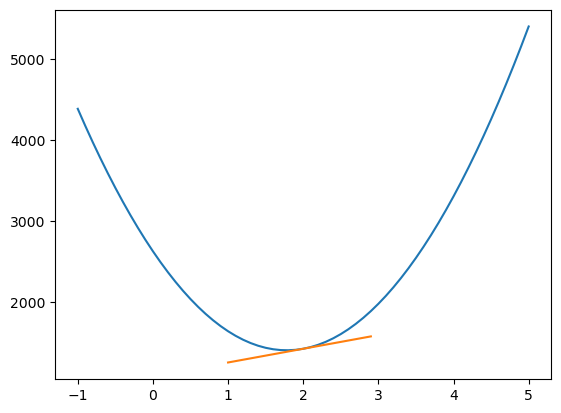

In [108]:
ff = lambda a: grad_rss(a,X,Y)
fff = lambda a: (a-a0) * ff(a0)+f(a0)
a_range = np.arange(a0-3, a0 + 3.1, 0.1)
plot_rss(f,a_range)
#plot_rss(ff,a_range)
a_range = np.arange(a0-1, a0 + 1, 0.1)
plot_rss(fff, a_range)

In [109]:
def grad_desc_rss(K, a0, learning_eps, f, ff, verbose):
    as_values = np.zeros(K + 1)
    as_values[0] = a0
    
    for k in range(K):
        as_values[k + 1] = as_values[k] - learning_eps * ff(as_values[k])
        if verbose:
            plt.plot([as_values[k], as_values[k + 1]], [f(as_values[k]), f(as_values[k + 1])], linestyle=':')
    
    if verbose:
        a_range = np.arange(min(as_values) - 1, max(as_values) + 1, 0.1)
        plot_rss(f, a_range)
        
        fff = lambda a: (a - a0) * ff(a0) + f(a0)
        a_range = np.arange(a0 - 1, a0 + 1, 0.1)
        plot_rss(fff, a_range)
        
        fff = lambda a: (a - as_values[k + 1]) * ff(as_values[k + 1]) + f(as_values[k + 1])
        a_range = np.arange(as_values[k + 1] - 1, as_values[k + 1] + 1, 0.1)
        plot_rss(fff, a_range)
    
    return as_values

2.0
1.8308784801676812
1.791980530606248
1.7830340022071183
1.7809763006753185
1.7805030293230044
1.7803941769119722
1.780369140857435
1.7803633825648912
1.780362058157606
1.7803617535439304


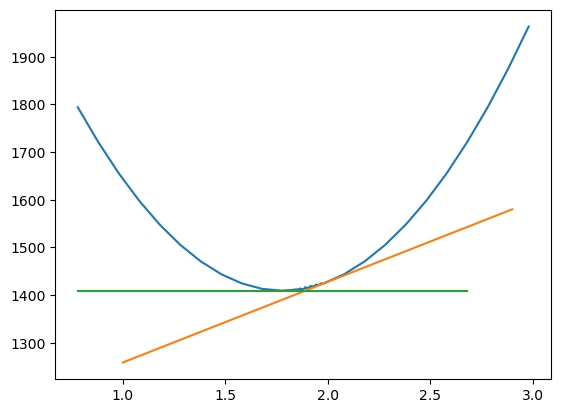

In [110]:
K = 10
learning_eps = 0.001
#learning_eps = 0.0001
#learning_eps = 0.003
as_v = grad_desc_rss(K, a0, learning_eps, f, ff, True)
for i in as_v:
    print(i)

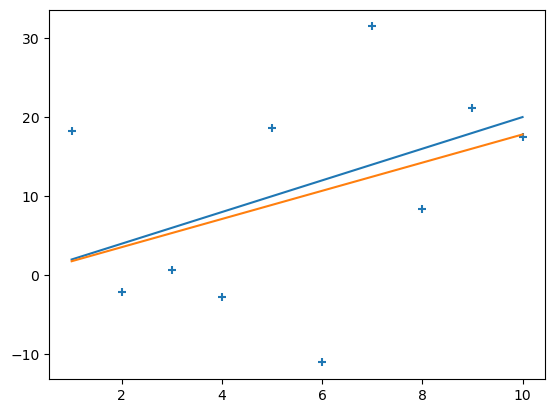

In [111]:
plt.scatter(X,Y, marker="+")
plt.plot(X, a0*X)
plt.plot(X,as_v[-1]*X)

## Newton method with one variable

In [112]:
h = 2 * np.sum(X**2)
learning_eps = 1/h
print (learning_eps)

0.0012987012987012987


array([2.        , 1.78036166])

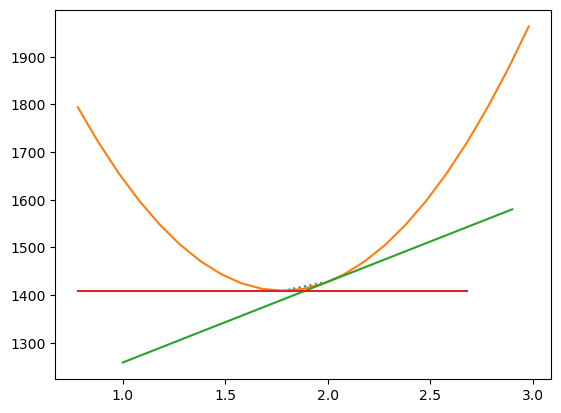

In [113]:
grad_desc_rss(1,a0, learning_eps, f, ff, True)

## Gradient descent with two (and more) variables

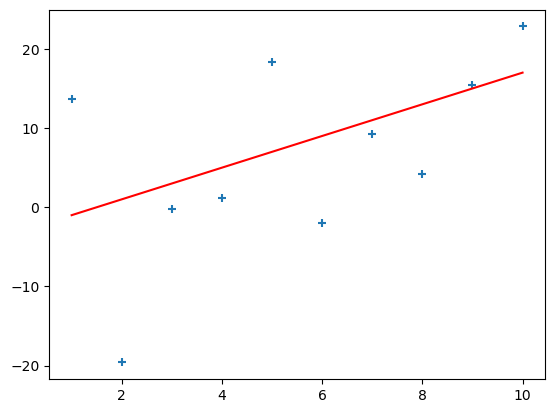

In [114]:
a0 = 2
b0 = -3
X = np.arange(1,N+1)
Y = a0 * X +b0 + np.random.normal(0,10,N)
plt.scatter(X, Y, marker = "+")
plt.plot(X,a0*X +b0, "r")

In [115]:
def rss2(a, b, X,Y):
    n = len(X)
    err = 0
    for i in range(n):
        err = err + (Y[i] - a*X[i] - b)**2
    return err

In [116]:
def plot3d(f, A, B,real3d):
    vectorized_f = np.vectorize(f)
    Z = vectorized_f(A,B)
    
    if real3d:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        surf = ax.plot_surface(A, B, Z, cmap='viridis')
        fig.colorbar(surf)
    else:
        contour = plt.contour(A, B, Z, cmap='viridis')
        plt.colorbar(contour)
        plt.plot(a0,b0,"+", markersize= 10)
        
    plt.show()

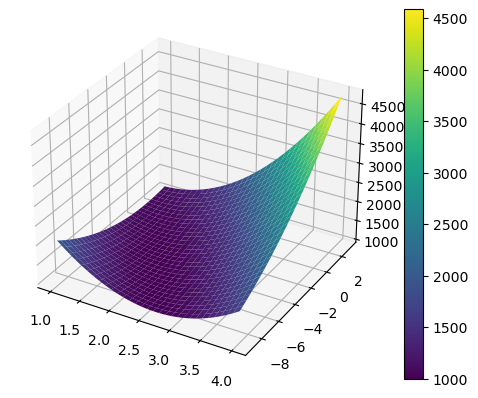

In [117]:
f = lambda a,b: rss2(a, b, X, Y)
A, B = np.meshgrid(np.arange(a0 - 1, a0 + 2.1, 0.1),np.arange(b0 - 6, b0 + 6.1, 0.4))

plot3d(f,A,B, True)

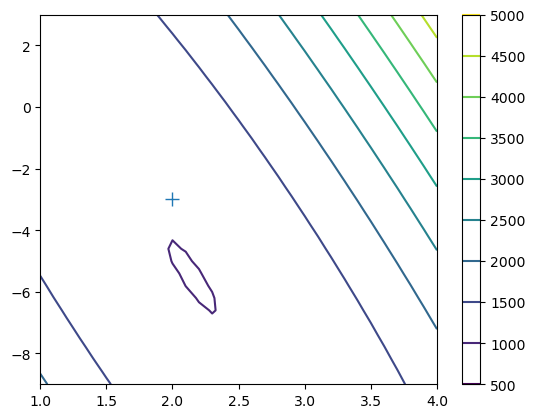

In [118]:
plot3d(f, A, B, False)

In [119]:
def grad_rss2(a, b, X, Y):
    n = len(X)
    grad_a = 0
    grad_b = 0
    for i in range(n):
        tmp = Y[i]- a*X[i] -b
        grad_a = grad_a + tmp * X[i]
        grad_b = grad_b +tmp
    grad_a = -2 * grad_a
    grad_b = -2 * grad_b
    grad_w = np.array([grad_a, grad_b])
    return grad_w

In [120]:
def grad_desc_rss2(K, a0, b0, learning_eps, f, ff, verbose):
    as_values = np.zeros(K + 1)
    bs_values = np.zeros(K + 1)
    as_values[0] = a0
    bs_values[0] = b0
    
    for k in range(K):
        grad_w = ff(as_values[k], bs_values[k])
        grad_a = grad_w[0]
        grad_b = grad_w[1]
        as_values[k + 1] = as_values[k] - learning_eps * grad_a
        bs_values[k + 1] = bs_values[k] - learning_eps * grad_b
        
        if verbose:
            plt.plot([as_values[k], as_values[k + 1]], [bs_values[k], bs_values[k + 1]])
    
    if verbose:
        alow = min(np.append(as_values, a0 - 2))
        ahigh = max(np.append(as_values, a0 + 2))
        blow = min(np.append(bs_values, b0 - 9))
        bhigh = max(np.append(bs_values, b0))
        A, B = np.meshgrid(np.arange(alow, ahigh + 0.1, 0.1), np.arange(blow, bhigh + 0.4, 0.4))
        plot3d(f, A, B, False)  # 3D contour

    return as_values, bs_values

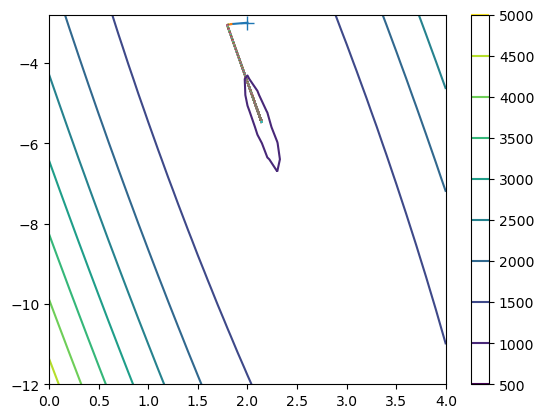

In [121]:
ff = lambda a,b: grad_rss2(a,b,X,Y)
K = 1000
learning_eps = 0.001
#learning_eps = 0.0001
#learning_eps = 0.0025
#learning_eps = 0.00255
as_values, bs_values = grad_desc_rss2(K, a0, b0, learning_eps, f, ff, True)
results = np.array([as_values, bs_values]).T

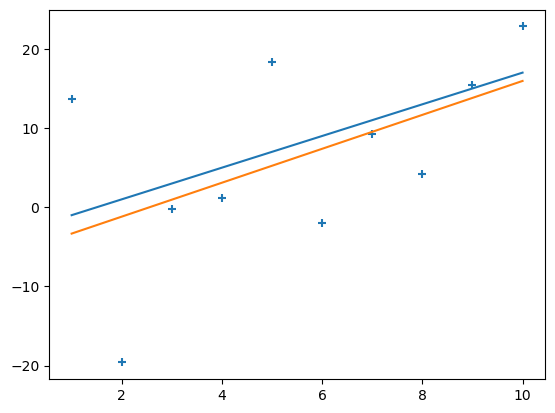

In [122]:
plt.scatter(X,Y,marker="+")
plt.plot(X, a0*X + b0)
plt.plot(X, as_values[-1] * X + bs_values[-1])

## Newton method with two (and more) variables

In [123]:
H = np.zeros((2,2))
H[0,0] = 2*np.sum(X**2)
H[0,1] = 2*np.sum(X)
H[1,0] = H[0,1]
H[1,1] = 2*N
H_inv = np.linalg.inv(H)
print("H = \n", H)
print("H_inv = \n", H_inv)

H = 
 [[770. 110.]
 [110.  20.]]
H_inv = 
 [[ 0.00606061 -0.03333333]
 [-0.03333333  0.23333333]]


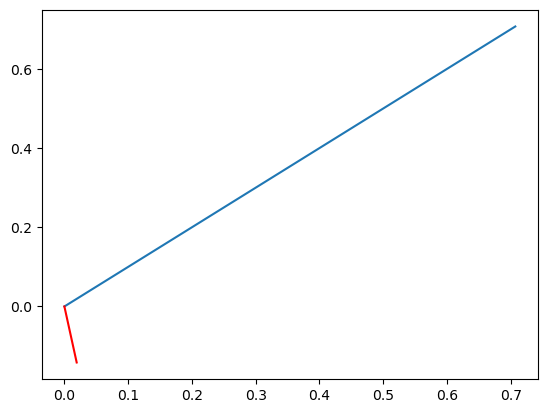

In [124]:
v = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
plt.plot([0,v[0]], [0,v[1]])
v2 = -H_inv @ v #Multiplies the inverse Hessian matrix H_inv by the vector v and then scales the result by -1.
plt.plot([0, v2[0]], [0, v2[1]], 'r')

In [125]:
def newton_rss2(K, a0, b0, H, f, ff, verbose):
    H_inv = np.linalg.inv(H)
    ab = np.zeros((2, K+1))
    ab[0,0] = a0
    ab[1, 0] = b0
    
    for k in range(K):
        grad_w = ff(ab[0, k], ab[1, k])
        grad_a = grad_w[0]
        grad_b = grad_w[1]
        ab[:, k + 1] = ab[:, k] - H_inv @ np.array([grad_a, grad_b])
        
        if verbose:
            plt.plot([ab[0, k], ab[0, k + 1]], [ab[1, k], ab[1, k + 1]])
    
    if verbose:
        alow = min(np.append(ab[0, :], a0 - 2))
        ahigh = max(np.append(ab[0, :], a0 + 2))
        blow = min(np.append(ab[1, :], b0 - 9))
        bhigh = max(np.append(ab[1, :], b0 + 0))
        A, B = np.meshgrid(np.arange(alow, ahigh + 0.1, 0.1), np.arange(blow, bhigh + 0.4, 0.4))
        plot3d(f, A, B, False)  # 3D contour

    return ab

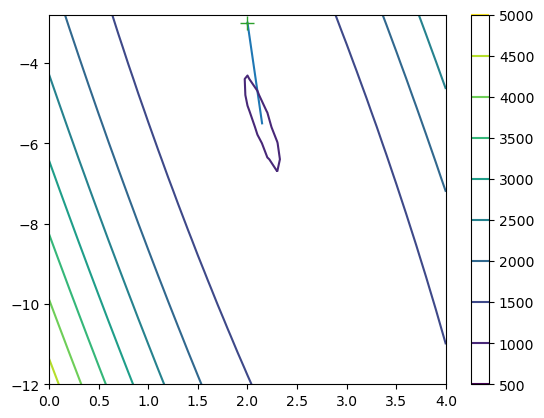

In [126]:
K = 2
ab_newton = newton_rss2(K, a0, b0, H ,f , ff, True)

In [127]:
rss_0 = f(a0, b0)
rss_opt = f(ab_newton[0, -1], ab_newton[1, -1])

print("rss_0 =", rss_0)
print("rss_opt =", rss_opt)

rss_0 = 1027.04063739952
rss_opt = 996.4956782237203


In [128]:
def damped_newton_rss2(K, a0, b0, H, gamma, f, ff, verbose):
    H_inv = gamma * np.linalg.inv(H)
    ab = np.zeros((2, K + 1))
    ab[0, 0] = a0
    ab[1, 0] = b0
    
    for k in range(K):
        grad_w = ff(ab[0, k], ab[1, k])
        grad_a = grad_w[0]
        grad_b = grad_w[1]
        ab[:, k + 1] = ab[:, k] - H_inv @ np.array([grad_a, grad_b])
        
        if f(ab[0, k + 1], ab[1, k + 1]) >= f(ab[0, k], ab[1, k]):
            k -= 1
            break
        
        if verbose:
            plt.plot([ab[0, k], ab[0, k + 1]], [ab[1, k], ab[1, k + 1]])
    
    res = ab[:, :k + 2]
    
    if verbose:
        alow = min(np.append(ab[0, :], a0 - 2))
        ahigh = max(np.append(ab[0, :], a0 + 2))
        blow = min(np.append(ab[1, :], b0 - 9))
        bhigh = max(np.append(ab[1, :], b0 + 0))
        A, B = np.meshgrid(np.arange(alow, ahigh + 0.1, 0.1), np.arange(blow, bhigh + 0.4, 0.4))
        plot3d(f, A, B, False)  # 3D contour
    
    return res

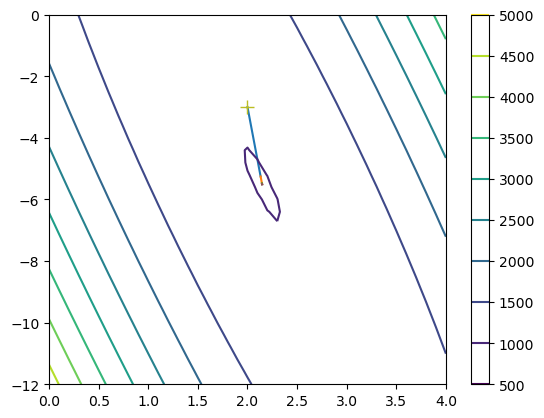

In [129]:
K = 1000
gamma = 0.1
gamma = 0.9
ab_newton = damped_newton_rss2(K, a0, b0, H, gamma, f, ff, True)

In [130]:
rss_0 = f(a0, b0)
rss_opt = f(ab_newton[0, -1], ab_newton[1, -1])

print("rss_0 =", rss_0)
print("rss_opt =", rss_opt)

rss_0 = 1027.04063739952
rss_opt = 996.4956782237203


In [131]:
a_final = ab_newton[0, -1]
b_final = ab_newton[1, -1]

a_final, b_final

(2.1470823225107227, -5.504836578003726)